<span style="font-size:30px;">Packages</span>

In [1]:
from dask.distributed import Client
from glob import glob
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.colors as mcolors
import numpy as np

<span style="font-size:30px;">Read data</span>

In [2]:
flist_control=sorted(glob('/g/data/bs94/AUS2200/coralsea-sstobs/v1-0/10min/tas/tas_AUS2200_flood22-coralsea-control_subhrPt_2022*.nc'))
flist_exp=sorted(glob('/g/data/bs94/AUS2200/coralsea-sstreduced/v1-0/10min/tas/tas_AUS2200_flood22-reducedsst_subhrPt_2022*.nc'))

In [3]:
client=Client()

<span style="font-size:30px;">Analysis</span>

In [4]:
ds_control = xr.open_mfdataset(flist_control,parallel=True,preprocess=lambda x: x['tas'])
ds_exp = xr.open_mfdataset(flist_exp,parallel=True,preprocess=lambda x: x['tas'])

In [5]:
da_fin_control=ds_control.resample(time='1D',offset='23h').mean()
da_fin_exp=ds_exp.resample(time='1D',offset='23h').mean()

In [6]:
sst_control=da_fin_control['tas']
sst_exp=da_fin_exp['tas']

In [7]:
sst_control = sst_control.sel(time=slice('2022-02-23T23:00:00.000000000','2022-03-01T23:00:00.000000000'))
sst_exp = sst_exp.sel(time=slice('2022-02-23T23:00:00.000000000','2022-03-01T23:00:00.000000000'))

sst_dailymean_control = sst_control.mean(dim='time')
sst_dailymean_exp = sst_exp.mean(dim='time')

EAust_sst_control = sst_dailymean_control.sel(lat=slice(-44,-10), lon=slice(143,159))
EAust_sst_control = EAust_sst_control-273.15
EAust_sst_exp = sst_dailymean_exp.sel(lat=slice(-44,-10), lon=slice(143,159))
EAust_sst_exp = EAust_sst_exp-273.15

lat = EAust_sst_control.lat.loc[:]
lon = EAust_sst_control.lon.loc[:]

sst_cont_minus_exp = EAust_sst_control - EAust_sst_exp

<span style="font-size:30px;">Plots</span>

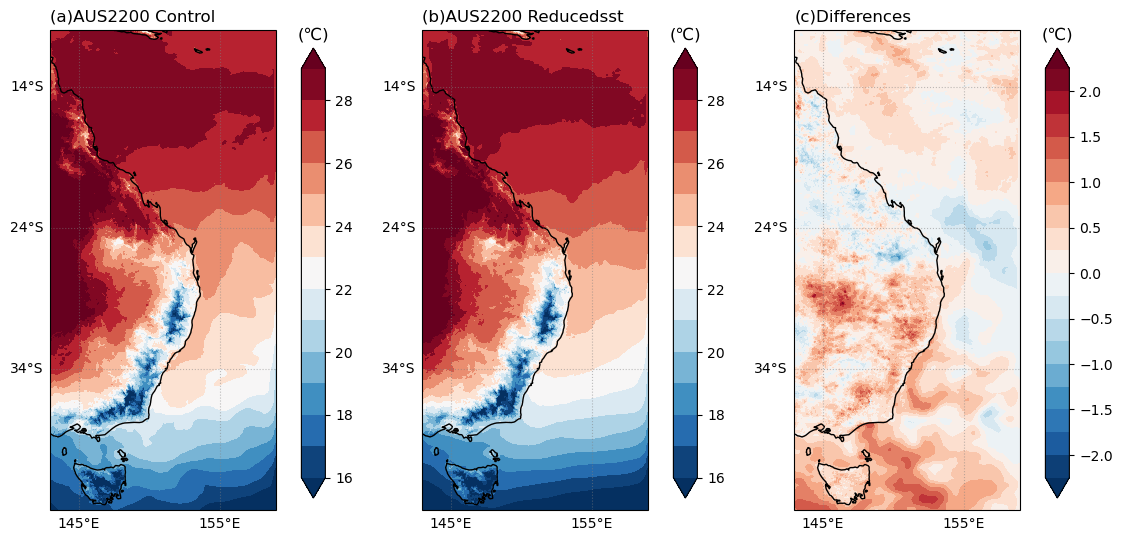

In [8]:
# Create a plot
plt.figure(figsize=(12, 6))

ax = plt.axes([0.04, 0.1, 0.25, 0.8], projection = ccrs.PlateCarree())
ax.set_extent([143, 159, -44, -10], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle=':', xlocs=np.arange(135, 159, 10), ylocs=np.arange(-44, -10, 10))
gl.right_labels = False
gl.top_labels = False
ax.coastlines()
ax.set_title('(a)AUS2200 Control', loc='left')
cf = ax.contourf(lon, lat, EAust_sst_control, np.arange(16, 30, 1), transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r, extend='both')
position = plt.axes([0.28, 0.12, 0.02, 0.75])
cbar = plt.colorbar(cf, cax=position, orientation='vertical')
cbar.ax.set_title(r'(℃)')

ax = plt.axes([0.35, 0.1, 0.25, 0.8], projection = ccrs.PlateCarree())
ax.set_extent([143, 159, -44, -10], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle=':', xlocs=np.arange(135, 159, 10), ylocs=np.arange(-44, -10, 10))
gl.right_labels = False
gl.top_labels = False
ax.coastlines()
ax.set_title('(b)AUS2200 Reducedsst', loc='left')
cf = ax.contourf(lon, lat, EAust_sst_exp, np.arange(16, 30, 1), transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r, extend='both')
position = plt.axes([0.59, 0.12, 0.02, 0.75])
cbar = plt.colorbar(cf, cax=position, orientation='vertical')
cbar.ax.set_title(r'(℃)')

ax = plt.axes([0.66, 0.1, 0.25, 0.8], projection = ccrs.PlateCarree())
ax.set_extent([143, 159, -44, -10], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle=':', xlocs=np.arange(135, 159, 10), ylocs=np.arange(-44, -10, 10))
gl.right_labels = False
gl.top_labels = False
ax.coastlines()
ax.set_title('(c)Differences', loc='left')
cf = ax.contourf(lon, lat, sst_cont_minus_exp, np.arange(-2.25,2.5,0.25), transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r, extend='both')
position = plt.axes([0.9, 0.12, 0.02, 0.75])
cbar = plt.colorbar(cf, cax=position, orientation='vertical')
cbar.ax.set_title(r'(℃)')

plt.show()